# 1. **Business Problem**

The Client

    XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project Objective:

    To generate insights to help XYZ identify the right company to make their investment.



# 2. Data Processing



In [5]:
!pip install plotly

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

In [6]:
Cab_Data = pd.read_csv('/Users/jeevan/Downloads/Cab_Data.csv')
Customer_Data = pd.read_csv('/Users/jeevan/Downloads/Customer_ID.csv')
Transaction_Data = pd.read_csv('/Users/jeevan/Downloads/Transaction_ID.csv')
City_Data = pd.read_csv('/Users/jeevan/Downloads/City.csv')
Holiday_Data = pd.read_csv('/Users/jeevan/Downloads/USHolidays.csv')

In [7]:
Cab_Data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,07-01-2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,03-01-2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,07-01-2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,12-01-2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,06-01-2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [8]:
Customer_Data.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [9]:
Transaction_Data.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [10]:
City_Data.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [11]:
Holiday_Data.head(10)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
5,2009-07-04,4th of July,Saturday,7,4,2009
6,2010-07-04,4th of July,Sunday,7,4,2010
7,2011-07-04,4th of July,Monday,7,4,2011
8,2012-07-04,4th of July,Wednesday,7,4,2012
9,2013-07-04,4th of July,Thursday,7,4,2013


In [12]:
Cab_Data.info()
Customer_Data.info()
Transaction_Data.info()
City_Data.info()
Holiday_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [13]:
print(Cab_Data.describe())
print(Customer_Data.describe())
print(Transaction_Data.describe())
print(City_Data.describe())
print(Holiday_Data.describe())

       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000

Data info tells us that there are 0 missing values in all 5 data sets. 

Next, we are going to merge data, change data type and create some interested features. 

In [14]:
# Prepare Holiday_Data for merging
Holiday_Data['Date'] = pd.to_datetime(Holiday_Data['Date'])
Holiday = [1]*Holiday_Data.shape[0]
Holiday_Data['Holiday'] = Holiday
Holiday_Data = Holiday_Data[['Date','Holiday']]
Holiday_Data.drop_duplicates()
Holiday_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.5 KB


In [15]:
# Prepare Cab_data for merging
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])
Cab_Data = Cab_Data.rename(columns = {'Date of Travel': 'Date'})
Cab_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date            359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [16]:
# Merged all data into one data set for convenience.
Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID').merge(City_Data, on = 'City').merge(Holiday_Data, how="left",on = 'Date')
Merged_Data['Holiday'] = Merged_Data['Holiday'].fillna(0)
missing_value = 0
for column in Merged_Data.columns :
    missing_value += Merged_Data[column].isna().sum() + Merged_Data[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(Merged_Data.shape[0] ,Merged_Data.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(Merged_Data.dtypes))


Merged dataset has 359854 entries , 15 features and 0 missing values

Feature's datatypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object


In [17]:
# data cleaning
for column in Merged_Data.columns:
    if ' ' in column:
        Merged_Data = Merged_Data.rename(columns={column:column.replace(' ','_')})
for column in ["Population","Users"] :
    Merged_Data[column] = Merged_Data[column].str.replace(',','')
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    Merged_Data[column] = Merged_Data[column].astype('category')
for column in ["Population", "Users","Holiday"] :
    Merged_Data[column] = Merged_Data[column].astype('int64')

Merged_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359854 entries, 0 to 359853
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359854 non-null  int64         
 1   Date                359854 non-null  datetime64[ns]
 2   Company             359854 non-null  category      
 3   City                359854 non-null  category      
 4   KM_Travelled        359854 non-null  float64       
 5   Price_Charged       359854 non-null  float64       
 6   Cost_of_Trip        359854 non-null  float64       
 7   Customer_ID         359854 non-null  int64         
 8   Payment_Mode        359854 non-null  category      
 9   Gender              359854 non-null  category      
 10  Age                 359854 non-null  int64         
 11  Income_(USD/Month)  359854 non-null  int64         
 12  Population          359854 non-null  int64         
 13  Users               359854 no

In [18]:
# Derive some interested features for later analysis
Merged_Data['Year'] = Merged_Data['Date'].dt.year
Merged_Data['Month'] = Merged_Data['Date'].dt.month
Merged_Data['Profit'] = Merged_Data['Price_Charged'] - Merged_Data['Cost_of_Trip']
Merged_Data['Profit_Rate'] = ((Merged_Data['Price_Charged'] - Merged_Data['Cost_of_Trip'])/Merged_Data['Cost_of_Trip'])*100
Merged_Data['Profit_per_KM'] = Merged_Data['Profit']/ Merged_Data['KM_Travelled']
Merged_Data['User_Ratio'] = Merged_Data['Users']/Merged_Data['Population']*100
Merged_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359854 entries, 0 to 359853
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359854 non-null  int64         
 1   Date                359854 non-null  datetime64[ns]
 2   Company             359854 non-null  category      
 3   City                359854 non-null  category      
 4   KM_Travelled        359854 non-null  float64       
 5   Price_Charged       359854 non-null  float64       
 6   Cost_of_Trip        359854 non-null  float64       
 7   Customer_ID         359854 non-null  int64         
 8   Payment_Mode        359854 non-null  category      
 9   Gender              359854 non-null  category      
 10  Age                 359854 non-null  int64         
 11  Income_(USD/Month)  359854 non-null  int64         
 12  Population          359854 non-null  int64         
 13  Users               359854 no

# 3. Compare Yellow Cab and Pink Cab from Different Aspects

In this section , we compare the data of Yellow Cab and Pink Cab to answer the following questions.

**3.1 What's the profit rate of Cab market? Which company has higher profit rate?**

**3.2 Does Yellow Cab have bigger market share than Pink Cab?**

**3.3 Do Customers prefer Yellow Cab to Pink Cab?**

**3.4 Can Yellow Cab make more profit in the future?**
 
As some figures and tables have implications for different questions, we will analyze step-by-step and then make a summary answer at last. 

<AxesSubplot:xlabel='Profit_per_KM', ylabel='Count'>

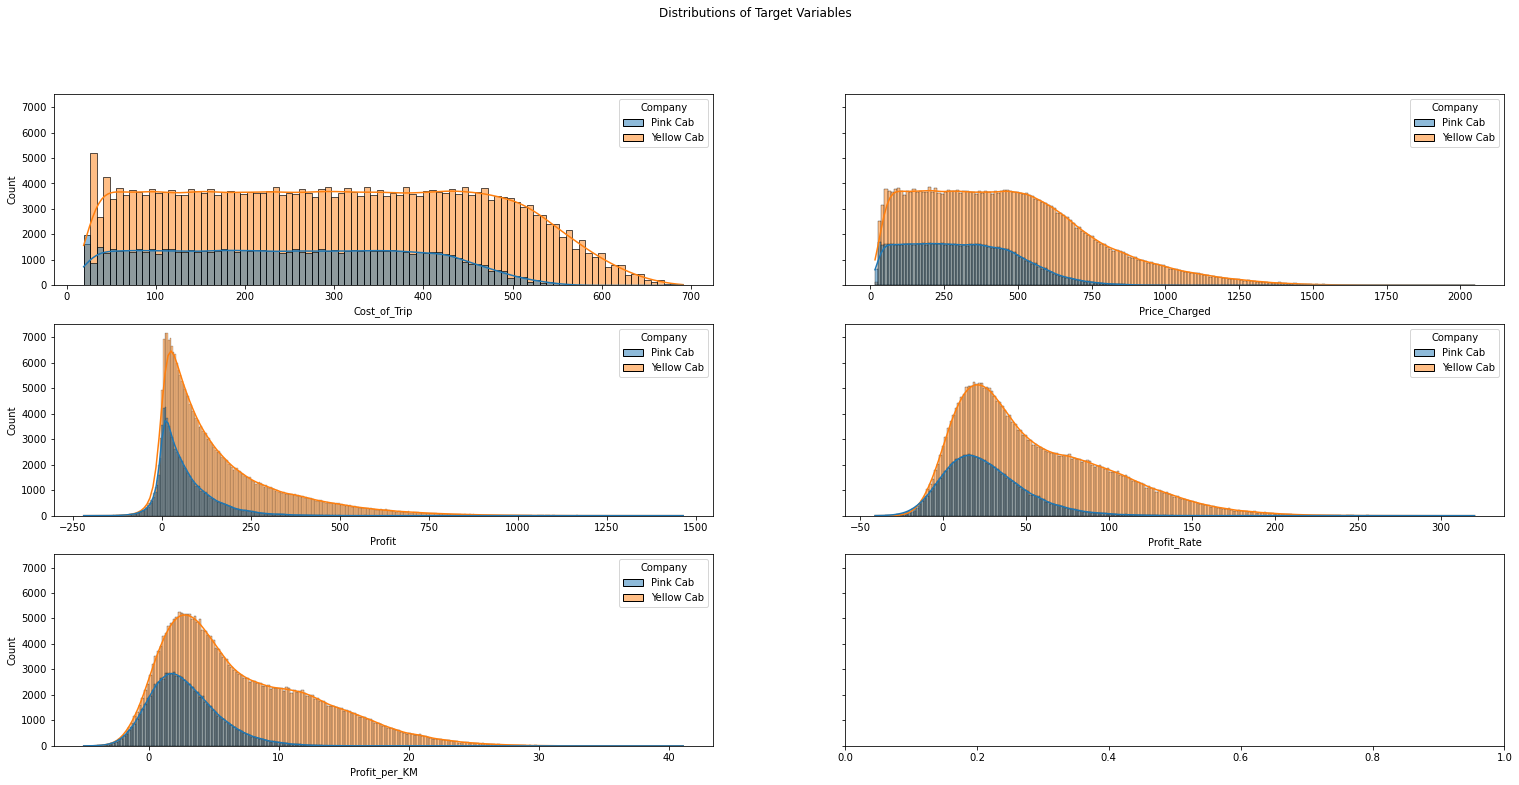

In [19]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=Merged_Data , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=Merged_Data , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=Merged_Data , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=Merged_Data , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=Merged_Data , x='Profit_per_KM' , kde = True , hue="Company")

We can see from the last three figures that distributions of profits are all right skewed. But Yellow Cab has a visible bump to the right of peak in the distribution of Profit Rate and Profit per KM, which will probably lead to higher total profit rate. So we will check company's profit rate next. 

Annual Profit Rate of Cab Market
Company   Pink Cab  Yellow Cab  Cab Market
Year                                      
2016     27.659727   56.719546   50.864915
2017     26.937759   56.744110   50.639303
2018     21.427914   48.213674   42.691567


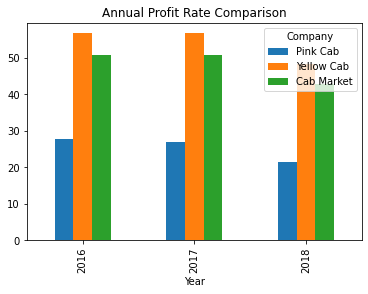

In [20]:
Annual_Profit_Rate = Merged_Data.groupby(['Year','Company']).Profit.sum().unstack()/Merged_Data.groupby(['Year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = Merged_Data.groupby(['Year']).Profit.sum()/Merged_Data.groupby(['Year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
plt.show()

From the last figure and table, we can see that Yellow Cab does have higher yearly profit rate (48% - 56%) than Pink Cab(21%-27%) in each of the recorded year. And one of the reasons is Yellow Cab have more high-profit-rate rides proportionally than Pink Cab. From this point of view, we think Yellow Cab is more efficient, but we still need to mine deeper into the data for an overall investment recommendation. 

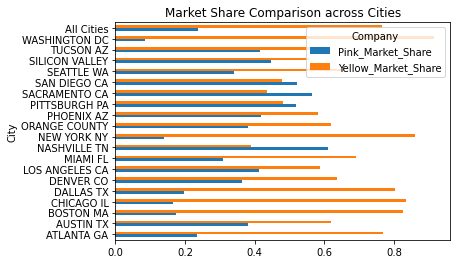

In [21]:
# Assume Pink and Yellow Cap are the only cab companies in USA. 
# Check market share of both cab companies at national and city level. 
Company_Transaction = Merged_Data.groupby(['City','Company']).Transaction_ID.count().unstack()
Company_Transaction.loc['All Cities'] = Company_Transaction.sum(numeric_only=True)
Company_Transaction['City_Market'] = Company_Transaction['Pink Cab'] + Company_Transaction['Yellow Cab']
Company_Transaction['Pink_Market_Share'] = Company_Transaction['Pink Cab']/Company_Transaction['City_Market']
Company_Transaction['Yellow_Market_Share'] = Company_Transaction['Yellow Cab']/Company_Transaction['City_Market']
ax = Company_Transaction.iloc[:,3:5].plot(kind='barh',stacked = False, title = 'Market Share Comparison across Cities')
plt.show()

Assume Pink and Yellow Cap are the only cab companies in USA. Yellow Cap's market share is three times greater than that of Pink Cap nationally. And Yellow Cap's advantage exists in most cities. As market share is highly related to the number of cabs owned by each company, this can be seen a stable advantage of Yellow Cab.

In [22]:
from sklearn.preprocessing import LabelEncoder
Data = Merged_Data.drop(['Transaction_ID', 'Customer_ID'], axis=1)
le = LabelEncoder()
Data["Gender"] = le.fit_transform(Data["Gender"])
Data["City"] = le.fit_transform(Data["City"])
Data["Payment_Mode"] = le.fit_transform(Data["Payment_Mode"])
Pink_Data = Data[Data['Company'] == 'Pink Cab'] 
Yellow_Data = Data[Data['Company'] == 'Yellow Cab']
Data["Company"] = le.fit_transform(Data["Company"])
Data

,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Holiday,Year,Month,Profit,Profit_Rate,Profit_per_KM,User_Ratio
0,2016-08-01,0,0,30.45,370.95,313.6350,0,1,28,10813,814885,24701,0,2016,8,57.3150,18.274427,1.882266,3.031225
1,2018-07-21,1,0,26.19,598.70,317.4228,1,1,28,10813,814885,24701,0,2018,7,281.2772,88.612790,10.739870,3.031225
2,2018-11-23,1,0,42.55,792.05,597.4020,0,1,28,10813,814885,24701,0,2018,11,194.6480,32.582415,4.574571,3.031225
3,2016-06-01,0,0,28.62,358.52,334.8540,0,1,27,9237,814885,24701,0,2016,6,23.6660,7.067558,0.826904,3.031225
4,2018-04-21,1,0,36.38,721.10,467.1192,0,1,27,9237,814885,24701,0,2018,4,253.9808,54.371732,6.981330,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359849,2018-03-03,1,18,38.40,668.93,525.3120,1,0,29,6829,418859,127001,0,2018,3,143.6180,27.339562,3.740052,30.320705
359850,2018-04-13,1,18,3.57,67.60,44.5536,1,0,29,6829,418859,127001,0,2018,4,23.0464,51.727358,6.455574,30.320705
359851,2018-06-07,1,18,23.46,331.97,337.8240,0,0,29,6829,418859,127001,0,2018,6,-5.8540,-1.732855,-0.249531,30.320705
359852,2018-02-08,1,18,27.60,358.23,364.3200,1,0,29,6829,418859,127001,0,2018,2,-6.0900,-1.671607,-0.220652,30.320705


In [24]:
Customer_Merged_Data_2 = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID')
Customer_Merged_Data_2['Year'] = Customer_Merged_Data_2['Date'].dt.year
Customer_Merged_Data_2 = Customer_Merged_Data_2[['Company', 'Customer ID','Year']]
Customer_Merged_Data_2 = Customer_Merged_Data_2.drop_duplicates()
Yellow_Customer_Merged_Data = Customer_Merged_Data_2[Customer_Merged_Data_2['Company'] == "Yellow Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Pink_Customer_Merged_Data = Customer_Merged_Data_2[Customer_Merged_Data_2['Company'] == "Pink Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Customer_Loyalty = Customer_Merged_Data_2.groupby(['Customer ID','Year']).count().unstack()
#tmp = Customer_Loyalty[Customer_Loyalty['Company' == "Yellow Cab"]]
print("Customer Number of Yellow Cab")
print(Yellow_Customer_Merged_Data)
print("Customer Number of Pink Cab")
print(Pink_Customer_Merged_Data)
seq = np.arange(0.1,1,0.1)
print(Customer_Loyalty.describe(seq))


Customer Number of Yellow Cab
      Customer ID
Year             
2016        25937
2017        27789
2018        27470
Customer Number of Pink Cab
      Customer ID
Year             
2016        16661
2017        18643
2018        18400
            Company                            
Year           2016          2017          2018
count  31152.000000  33418.000000  32938.000000
mean       1.367424      1.389431      1.392616
std        0.482111      0.487629      0.488340
min        1.000000      1.000000      1.000000
10%        1.000000      1.000000      1.000000
20%        1.000000      1.000000      1.000000
30%        1.000000      1.000000      1.000000
40%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
60%        1.000000      1.000000      1.000000
70%        2.000000      2.000000      2.000000
80%        2.000000      2.000000      2.000000
90%        2.000000      2.000000      2.000000
max        2.000000      2.000000      2.0

Yellow Cap has more customers in all years and 60%-70% customers use only Cap company. 

<AxesSubplot:>

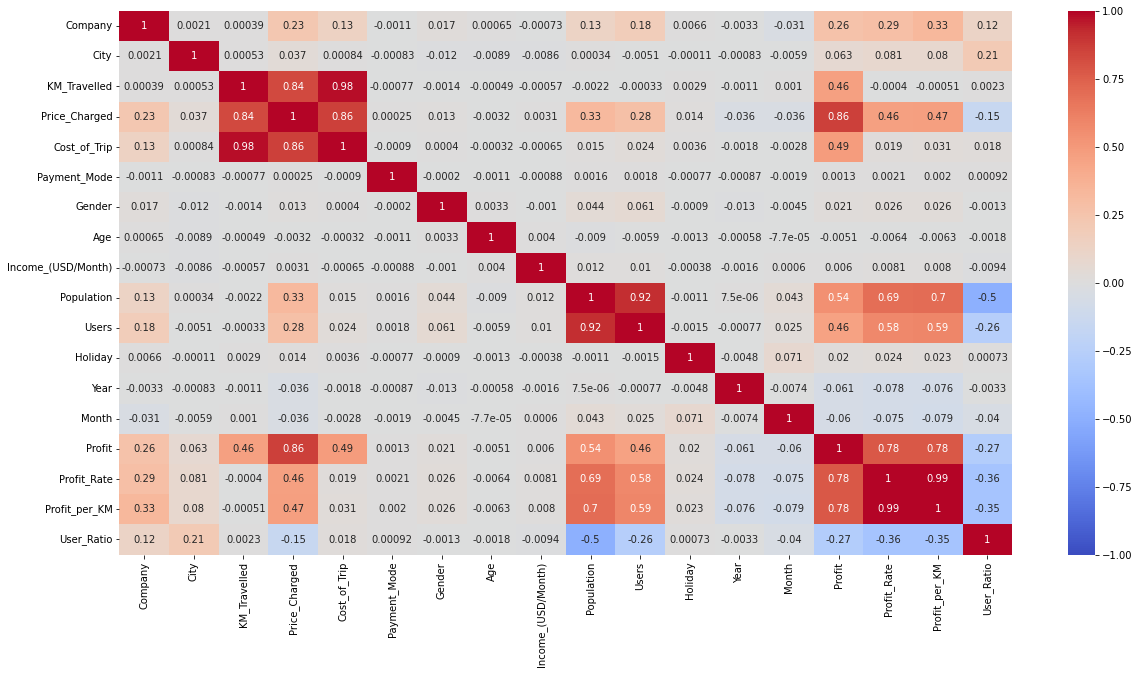

In [26]:
Corr = Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:>

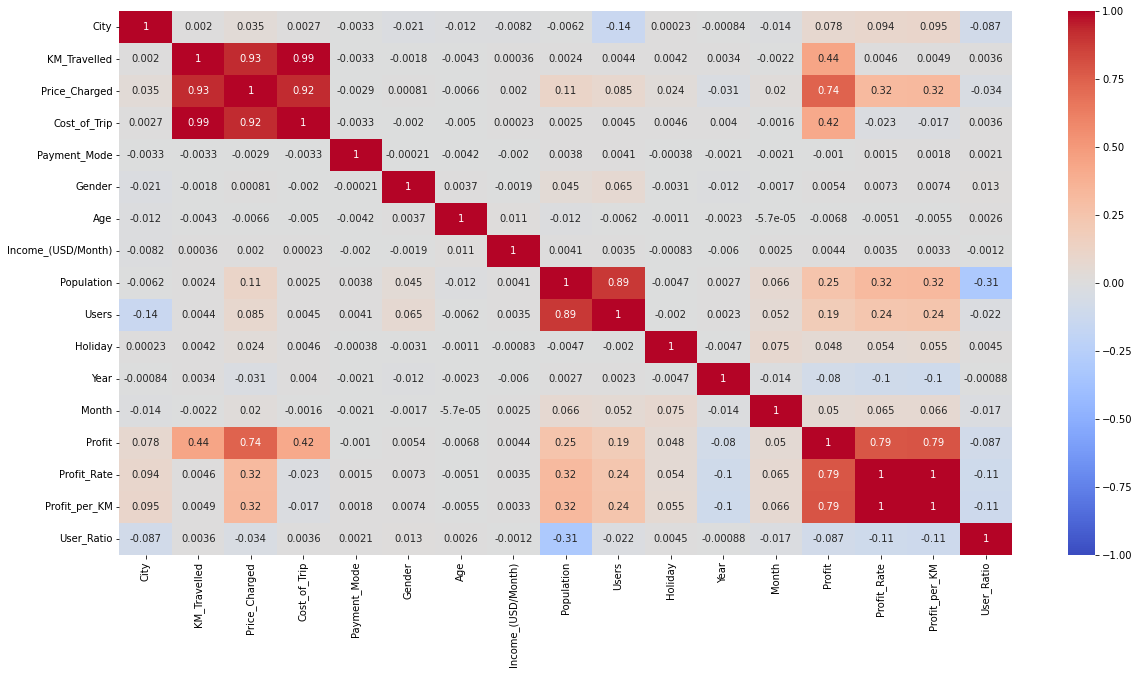

In [27]:
#
Pink_Corr = Pink_Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:>

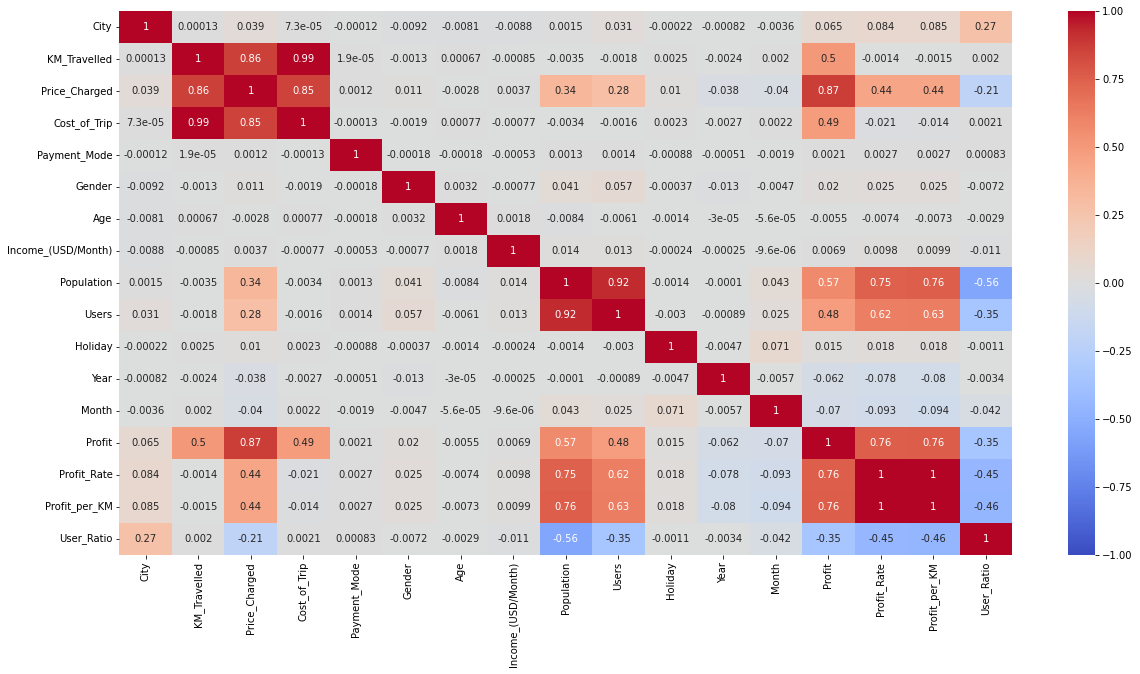

In [28]:
#
Yellow_Corr = Yellow_Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Heatmaps also tell us some intuitive truth: Price_Charged is positively related to profit indexes, i.e., Profit, Profit_Rate, Profit_per_KM. However, we also find that the correlations between Population, Users and profit indexes of Yellow Cab is much higher than those of Pink Cab. This review the pricing power of Yellow Cab in bigger cities. Or we can say that geographical price differentiation is the strategy Yellow Cab uses to increase profit.

Let's review the questions asked at the beginning of this section:

**3.1 What's the profit rate of Cab market? Which company has higher profit rate?**

**Ans: 50% is the profit of Cab Market, and Yellow Cab has higher yearly profit rate (48% - 56%) than Pink Cab(21%-27%) in each of the recorded year.**

**3.2 Does Yellow Cab have bigger market share than Pink Cab?**

**Ans: Yes, Yellow Cab's market share is two times greater than Pink Cab's, though customer number is just 0.5 time greater.**


**3.3 Do Customers prefer Yellow Cab to Pink Cab?**

**Ans: Not very clear from the data.**


**3.4 Can Yellow Cab make more profit in the future?**

**Ans:There are only three years of data, we are not sure whether Yellow cab can keep up their profit indexes as there is a decreasing in 2018 compared to 2016 and 2017. But Yellow Cab should be able to continue to earn more profit than Pink Cab with dominant market share and better pricing strategy.**

# 4. Investment Recommendation

**According to the analysis in Section 3, we recommend XYZ company to invest in Yellow Cab.**